### Aplikasi Metode Runge-Kutta Orde 4 pada Permasalahan Rangkaian R-L, R-C, dan R-L-C.

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

Bagian 1: Rangkaian R-L.

Pada rangkaian R-L, persamaan diferensial yang mendefinisikan kuat arus listriknya sebagai fungsi waktu adalah: $$Ri+L\frac{\mathrm{d}i}{\mathrm{d}t}=\varepsilon$$ Sehingga, $$\frac{\mathrm{d}i}{\mathrm{d}t}=\frac{\varepsilon-Ri}{L}$$ Persamaan ini akan diselesaikan menggunakan metode Runge-Kutta Orde 4 untuk $R=10\Omega$, $L=1$ H, dan $\varepsilon=5$ V, di mana kondisi awalnya adalah rangkaian dihubungkan dengan $\varepsilon$ pada $t=0$.

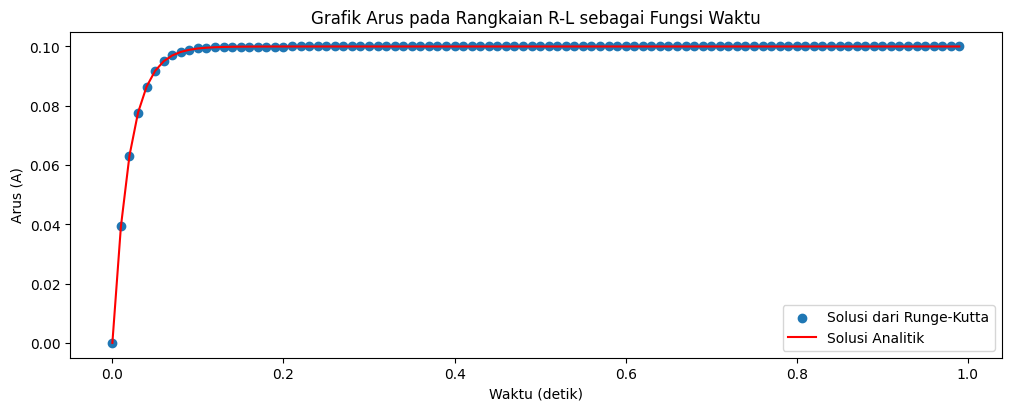

In [2]:
#Konstanta
R=50
L=1
eps=5
i0=0

#Definisi Pers. Diferensial
def didt(t,i):
    return (eps-R*i)/L

#Definisi Metode Runge-Kutta Orde 4
def RungeKutta4(f,t,y0):
    h=t[1]-t[0]
    n=len(t)
    xs=t
    ys=np.zeros(n)
    y=y0

    for j,x in enumerate(xs):
        ys[j]=y
        k0=h*f(x,y)
        k1=h*f(x+h/2,y+k0/2)
        k2=h*f(x+h/2,y+k1/2)
        k3=h*f(x+h,y+k2)
        y+=(k0+2*k1+2*k2+k3)/6
    return xs,ys

#Rangkaian disimulasi untuk 10 detik
ts=np.arange(0,1,0.01)
t,i=RungeKutta4(didt,ts,i0)

ianalitik=np.zeros(len(t))

for p in range(len(t)):
    ianalitik[p]=eps/R*(1-math.exp((-R/L)*t[p]))

fig,ax=plt.subplots(figsize=(10, 4), layout='constrained')
ax.scatter(t,i,label='Solusi dari Runge-Kutta')
ax.plot(t,ianalitik,'red',label='Solusi Analitik')
ax.legend()
ax.set_ylabel('Arus (A)')
ax.set_xlabel('Waktu (detik)')
ax.set_title('Grafik Arus pada Rangkaian R-L sebagai Fungsi Waktu')
plt.show()

Pada waktu yang sama, tegangan yang ada pada induktor ditunjukkan oleh grafik di bawah.

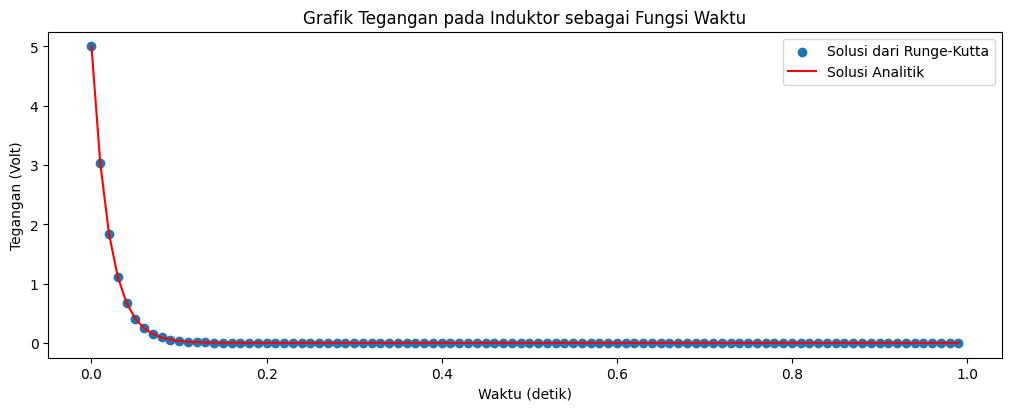

In [3]:
Vrunge=eps-i*R
Vanalitik=np.zeros(len(t))
for j in range(len(t)):
    Vanalitik[j]=eps*math.exp(-(R*t[j]/L))

fig,ax=plt.subplots(figsize=(10, 4), layout='constrained')
ax.scatter(t,Vrunge,label='Solusi dari Runge-Kutta')
ax.plot(t,Vanalitik,'red',label='Solusi Analitik')
ax.legend()
ax.set_ylabel('Tegangan (Volt)')
ax.set_xlabel('Waktu (detik)')
ax.set_title('Grafik Tegangan pada Induktor sebagai Fungsi Waktu')
plt.show()

Bagian 2. Rangkaian R-C seri. Pada rangkaian R-C seri, arus pada rangkaian didefinisikan dengan persamaan berikut. $$\frac{i}{RC}+\frac{\mathrm{d}i}{\mathrm{d}t}=0$$ Sehingga, $$\frac{\mathrm{d}i}{\mathrm{d}t}=-\frac{i}{RC}$$ Persamaan ini akan diselesaikan menggunakan metode Runge-Kutta Orde 4 untuk $R=5\Omega$, $C=0.02$ F, dan $\varepsilon=5$ V, di mana kondisi awalnya adalah rangkaian diputus dengan $\varepsilon$ pada $t=0$.

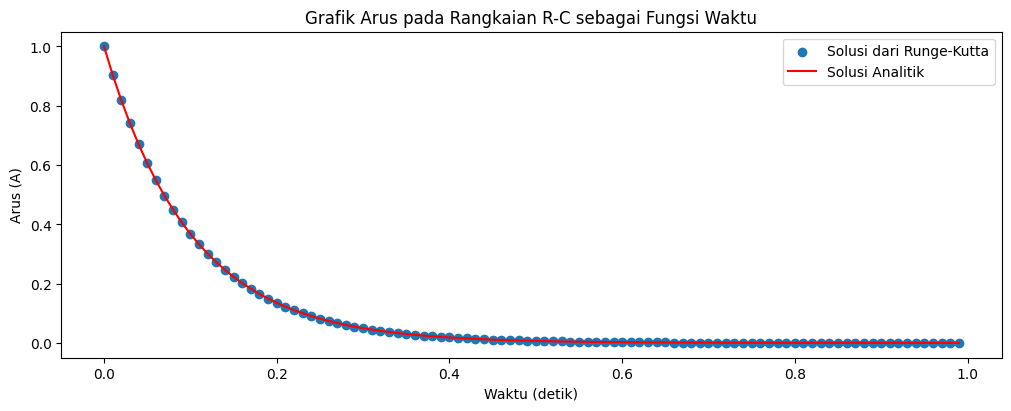

In [4]:
Res=5
C=0.02
vsource=5
i0atC=vsource/Res

def didtC(t,i):
    return -i/(Res*C)

def RungeKutta4(f,t,y0):
    h=t[1]-t[0]
    n=len(t)
    xs=t
    ys=np.zeros(n)
    y=y0

    for j,x in enumerate(xs):
        ys[j]=y
        k0=h*f(x,y)
        k1=h*f(x+h/2,y+k0/2)
        k2=h*f(x+h/2,y+k1/2)
        k3=h*f(x+h,y+k2)
        y+=(k0+2*k1+2*k2+k3)/6
    return xs,ys

tC=np.arange(0,1,0.01)
tC,iC=RungeKutta4(didtC,tC,i0atC)

capanalytic=np.zeros(len(tC))

for k in range(len(tC)):
    capanalytic[k]=vsource/Res*math.exp(-tC[k]/(Res*C))

fig,ax=plt.subplots(figsize=(10, 4), layout='constrained')
ax.scatter(tC,iC,label='Solusi dari Runge-Kutta')
ax.plot(tC,capanalytic,'red',label='Solusi Analitik')
ax.legend()
ax.set_ylabel('Arus (A)')
ax.set_xlabel('Waktu (detik)')
ax.set_title('Grafik Arus pada Rangkaian R-C sebagai Fungsi Waktu')
plt.show()

Untuk tegangan pada kapasitor di waktu yang sama,

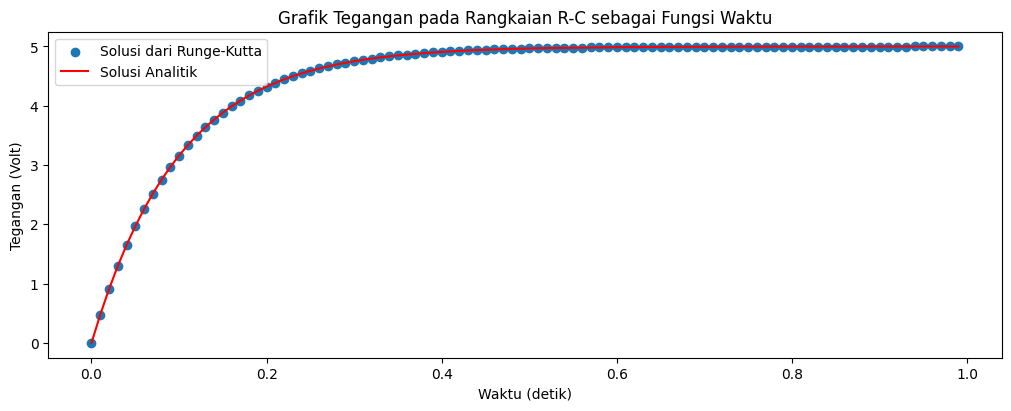

In [5]:
VCanalytic=np.zeros(len(tC))
Vcrunge=[]

for m in range(len(tC)):
    VCanalytic[m]=vsource*(1-math.exp(-t[m]/(Res*C)))
    Vcrunge.append(R*i[m])


fig,ax=plt.subplots(figsize=(10, 4), layout='constrained')
ax.scatter(tC,VCanalytic,label='Solusi dari Runge-Kutta')
ax.plot(tC,VCanalytic,'red',label='Solusi Analitik')
ax.legend()
ax.set_ylabel('Tegangan (Volt)')
ax.set_xlabel('Waktu (detik)')
ax.set_title('Grafik Tegangan pada Rangkaian R-C sebagai Fungsi Waktu')
plt.show()

Bagian 3. Rangkaian R-L-C seri. Pada rangkaian R-L-C seri, persamaan yang mendefinisikan rangkaian tersebut adalah arus yang mengalir pada rangkaian, yaitu $$L\frac{\mathrm{d}^2i}{\mathrm{d}t^2}+R\frac{\mathrm{d}i}{\mathrm{d}t}+\frac{1}{C}i=0$$ Atau, $$\frac{\mathrm{d}^2i}{\mathrm{d}t^2}=-\frac{R}{L}\frac{\mathrm{d}i}{\mathrm{d}t}-\frac{i}{LC}$$  Persamaan ini akan diubah menjadi suatu sistem persamaan diferensial orde satu, yaitu 
\begin{align}
\frac{\mathrm{d}i}{\mathrm{d}t}=s\\
\frac{\mathrm{d}s}{\mathrm{d}t}=-\frac{R}{L}s+\frac{i}{LC}
\end{align}

Sebuah kode baru didefinisikan untuk menyelesaikan sistem PDB menggunakan Runge-Kutta Orde 4 sebagai berikut.

In [6]:
Re=2
L2=2
C2=1/5

def F(t,u):
    i,s=u
    return np.array([s,-(Re/L2)*s+i/(L2*C2)])

def RK4System(f,u0,T):
    xt=T
    y=np.array((len(T)+1)*[u0])
    dx=xt[1]-xt[0]
    for i in range(len(T)):
        l0=dx*f(t[i],y[i])
        l1=dx*f(t[i]+dx/2,y[i]+l0/2)
        l2=dx*f(t[i]+dx/2,y[i]+l1/2)
        l3=dx*f(t[i]+dx,y[i]+l2)
        y[i+1]=y[i]+(l0+2*l1+2*l2+l3)/6
    return y,xt